# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## План действий:
1. *Открыть файл и изучить его*
2. *Разделить исходные данные на обучающую, валидационную и тестовую выборки*
3. *Исследовать качество разных моделей, меняя гиперпараметры*
4. *Проверить качество модели*
5. *Gроверить модели на вменяемость*

## 1. Откройте и изучите файл

### Импорт нужных библиотек

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings

In [5]:
warnings.filterwarnings('ignore') 

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

%matplotlib inline

In [13]:
# Функция для вывода общей информации о датасете
def df_info(df):
    df.info()
    display(df.head(10))
    print(f'Кол-во дубликатов: {df.duplicated().sum()}')
    print()
    print(f'Кол-во пропусков: {df.isnull().sum()}')


def diff(df, column, title, xlabel=None, ylabel=None):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data = df, palette = 'husl')
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.grid(True)
    plt.show()

### Краткий обзор данных

In [7]:
users_behavior = pd.read_csv('/datasets/users_behavior.csv')

In [8]:
df_info(users_behavior)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


Кол-во дубликатов: 0

Кол-во пропусков: calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


0    2229
1     985
Name: is_ultra, dtype: int64


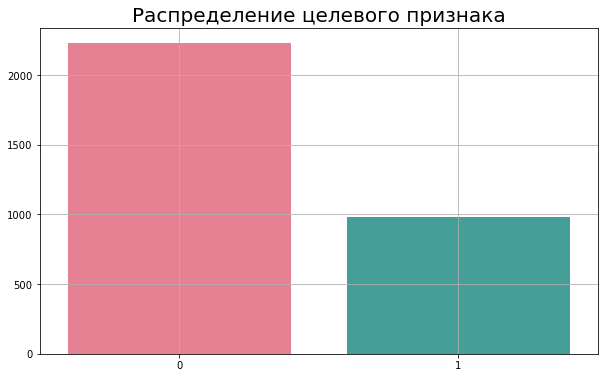

In [15]:
print(users_behavior['is_ultra'].value_counts())
diff(users_behavior, 'is_ultra', 'Распределение целевого признака')

*Присутствует дисбаланс классов*

### Вывод

*Результат показал, что мы работаем с переработанным файлом. Известно, что клиенты с тарифом "Ультра" 985 строк, с тарифом "Смарт" - 2229*

*Имеется 5 признаков, из них "is_ultra" является целевым*

## 2. Разбейте данные на выборки

*Спрятанной тестовой выборки нет. Значит, данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1.*

In [6]:
#60% отведем под обучение
df_train, df_valid = train_test_split(users_behavior, test_size = 0.4, random_state = 12345)

#Оставшиеся 40% разделим поровну между валидационной и тестовой
df_valid, df_test = train_test_split(df_valid, test_size = 0.5, random_state = 12345)

print("Исходник:", len(users_behavior))
print("Обучающая:", len(df_train))
print("Валидационная:", len(df_valid))
print("Тестовая:", len(df_test))


Исходник: 3214
Обучающая: 1928
Валидационная: 643
Тестовая: 643


*Видно, что разделили правильно*

### Разберем данные на признаки и целевой признак для тестовой и валидационной выборок

In [7]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

### Вывод

*Получили следующее соотношение: 3:1:1 для обучающей, валидационной и тестовой выборок*

*Для тестовой и валидационной выборок разделили на признаки и целевой признак*

## 3. Исследуйте модели

*Нам известные на данный момент следующие методы:*
    - *Дерево решений*
    - *Случайный лес*
    - *Логистическую регрессию*

In [18]:
from pycaret.classification import *

In [19]:
clf1 = setup(data = users_behavior, target = 'is_ultra')

,Description,Value
0,session_id,1396
1,Target,is_ultra
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3214, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8155,0.8285,0.5797,0.7807,0.6640,0.5408,0.5531,2.6580
gbc,Gradient Boosting Classifier,0.8106,0.8250,0.5572,0.7813,0.6484,0.5242,0.5394,0.0360
rf,Random Forest Classifier,0.8044,0.8105,0.5896,0.7377,0.6544,0.5206,0.5275,0.0800
et,Extra Trees Classifier,0.8013,0.8017,0.5713,0.7386,0.6434,0.5090,0.5176,0.0630
xgboost,Extreme Gradient Boosting,0.7950,0.7971,0.5741,0.7235,0.6378,0.4978,0.5058,0.1560
ada,Ada Boost Classifier,0.7919,0.8028,0.5050,0.7609,0.6029,0.4703,0.4907,0.0250
lightgbm,Light Gradient Boosting Machine,0.7910,0.7998,0.5671,0.7130,0.6299,0.4874,0.4946,0.0520
nb,Naive Bayes,0.7879,0.8094,0.5008,0.7436,0.5964,0.4606,0.4781,0.0070
qda,Quadratic Discriminant Analysis,0.7830,0.8124,0.4698,0.7482,0.5750,0.4403,0.4627,0.0070
knn,K Neighbors Classifier,0.7604,0.7204,0.4304,0.6910,0.5277,0.3801,0.4000,0.2640


In [21]:
cb = create_model('catboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.7907,0.5493,0.7500,0.6341,0.5010,0.5125
1,0.8133,0.8366,0.5915,0.7636,0.6667,0.5399,0.5484
2,0.8178,0.8151,0.5775,0.7885,0.6667,0.5454,0.5579
3,0.8267,0.8371,0.5704,0.8265,0.6750,0.5622,0.5801
4,0.8241,0.8549,0.6099,0.7818,0.6853,0.5657,0.5741
Mean,0.8164,0.8269,0.5797,0.7821,0.6655,0.5428,0.5546
SD,0.0094,0.0220,0.0203,0.0260,0.0171,0.0231,0.0239


In [23]:
tuned_cb = tune_model(cb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.7640,0.4648,0.7333,0.5690,0.4292,0.4495
1,0.7956,0.8315,0.5634,0.7273,0.6349,0.4961,0.5039
2,0.8267,0.8856,0.6479,0.7667,0.7023,0.5812,0.5853
3,0.7956,0.8156,0.5352,0.7451,0.6230,0.4878,0.5004
4,0.8089,0.8185,0.5915,0.7500,0.6614,0.5309,0.5381
5,0.8133,0.8092,0.5211,0.8222,0.6379,0.5205,0.5451
6,0.8267,0.8464,0.5915,0.8077,0.6829,0.5675,0.5806
7,0.8400,0.8282,0.5493,0.9070,0.6842,0.5856,0.6186
8,0.8489,0.8721,0.6338,0.8491,0.7258,0.6245,0.6372
9,0.8348,0.8530,0.6286,0.8000,0.7040,0.5917,0.6000


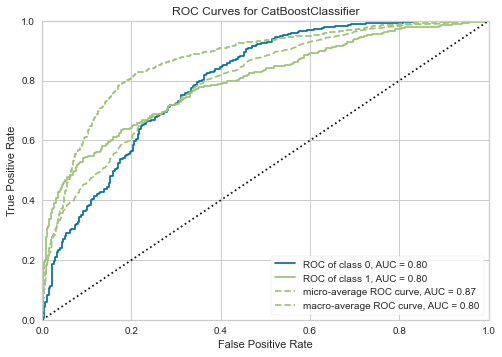

In [24]:
plot_model(cb)

In [25]:
pred_holdout = predict_model(cb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8041,0.7976,0.4964,0.7326,0.5918,0.4691,0.4845


### Дерево решений

In [8]:
best_model = None
best_result = 0
for depth in range(1, 31):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth) # обучите модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучите модель
    predictions_valid = model.predict(features_valid) # получите предсказания модели
    result = accuracy_score(target_valid, predictions_valid) # посчитайте качество модели
    #print("max_depth:", depth, "|", "Accuracy:", result)
    if result > best_result:
        best_model = model
        best_result = result
#print()
print("Accuracy наилучшей модели на валидационной выборке: ", best_result, " ", "при глубине: ", 3, sep = '')

Accuracy наилучшей модели на валидационной выборке: 0.7853810264385692 при глубине: 3


*Известно, что нужно довести долю правильных ответов по крайней мере до 0.75. 0.785 как раз попадает в промежуток, хоть почти и впритык. Идем дальше*

### Случайный лес

In [9]:
best_model = None
best_result = 0
best_depth = 0
best_est = 0

for est in range(10, 101, 10):
    for depth in range (1, 8):
        model = RandomForestClassifier(random_state=12345, max_depth = depth, n_estimators=est) # обучите модель с заданным количеством деревьев
        model.fit(features_train, target_train) # обучите модель на тренировочной выборке
        predictions_valid = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions_valid) # посчитайте качество модели на валидационной выборке
        if result > best_result:
            best_model = model # сохраните наилучшую модель
            best_result = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
            best_depth = depth
            best_est = est

print("Accuracy наилучшей модели на валидационной выборке:", best_result, "при глубине:", best_depth, "и кол-ву деревьев:", best_est)
valid_prov = best_result

Accuracy наилучшей модели на валидационной выборке: 0.80248833592535 при глубине: 7 и кол-ву деревьев: 30


*Случайный лес показал результат немного получше, чем дерево решений, но не ушел прям далеко*

### Логистическая регрессия

*Тут я получил предупреждение касательно гиперпараметра solver, поэтому решил перебрать существующие условия*

In [10]:
solvers = ['newton-cg', 'lbfgs', 'liblinear'] #sag и saga я убрал, так как они показывали малый результат

best_model = None
best_result = 0
best_solver = None

for solver in solvers:
    model = LogisticRegression(solver = solver, random_state=12345) # инициализируйте модель логистической регрессии
    model.fit(features_train, target_train)# обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid) # получите метрику качества модели на валидационной выборке
    if result > best_result:
        best_model = model # сохраните наилучшую модель
        best_result = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
        best_solver = solver

print("Accuracy модели логистической регрессии на валидационной выборке:", result, "при solver:", best_solver)

Accuracy модели логистической регрессии на валидационной выборке: 0.7589424572317263 при solver: liblinear


### *Видим, что лучший результат показал solver со значением 'liblinear'. Значения выше, чем у дерева решений, но меньше, чем случайный лес.*

### Вывод

*Из результатов выше можно понять, что лучшие результаты у случаного леса, но при этом он самый долгий из-за кол-во деревьев и выбранной глубины. В дальнейшем будем использовать модель случайного леса*

## 4. Проверьте модель на тестовой выборке

In [11]:
features_test = df_test.drop(['is_ultra'], axis = 1)
target_test = df_test['is_ultra']

model = RandomForestClassifier(n_estimators = 30, max_depth = 7, random_state = 12345)
model.fit(features_train, target_train)

predictions_test = model.predict(features_test)
print("Accuracy по тестовой выборке: ", end = '')
print(accuracy_score(target_test, predictions_test))
print("Accuracy по валидационной выборке: ", end = '')
print(valid_prov)

Accuracy по тестовой выборке: 0.8040435458786936
Accuracy по валидационной выборке: 0.80248833592535


### Вывод

*На тестовой выборке модель случайного леса показывает приблизительное к тренировочной выборке значение accuracy. Можем считать, что нам удалось построить модель для задачи бинарной классификации, которая выберет подходящий тариф.*

## 5. (бонус) Проверьте модели на адекватность

In [12]:
#Доля большего класса
print("Доля большего класса:", len(users_behavior.query('is_ultra == 0')) / len(users_behavior))
print()

model = DummyClassifier(strategy="most_frequent", random_state = 12345)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
print(accuracy_score(target_test, predictions_test))

Доля большего класса: 0.693528313627878

0.6842923794712286


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [ ] Весь код исполняется без ошибок
- [ ] Ячейки с кодом расположены в порядке исполнения
- [ ] Выполнено задание 1: данные загружены и изучены
- [ ] Выполнено задание 2: данные разбиты на три выборки
- [ ] Выполнено задание 3: проведено исследование моделей
    - [ ] Рассмотрено больше одной модели
    - [ ] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [ ] Написаны выводы по результатам исследования
- [ ] Выполнено задание 3: Проведено тестирование
- [ ] Удалось достичь accuracy не меньше 0.75
